#### **Solution of a nonlinear equation**

**For problems involving hand calculations, including the graphical tasks, you will assemble your work in a Word or PDF file and submit it along with this notebook file (i.e. you will submit two files).**

**1. By hand: Graphical illustration of nonlinear equation solvers (no numerical work)**

Given the function $f(x) = {x^3} - 10{x^2} + 5$, determine an estimate of the root that lies between 0 and 1 using the following methods:

*   Bisection
*   Secant
*   Newton-Raphson

**Plot the function, then print or save images of it to perform each method on a new plot. Use a straight edge to ensure your lines are straight.** Perform 3 iterations of each method. If a bracket is needed, use $[0, 1]$. If a starting guess is needed, use $x= .25$.

The true value of the root to 8 significant digits is 0.73460351

0.3442797036503036


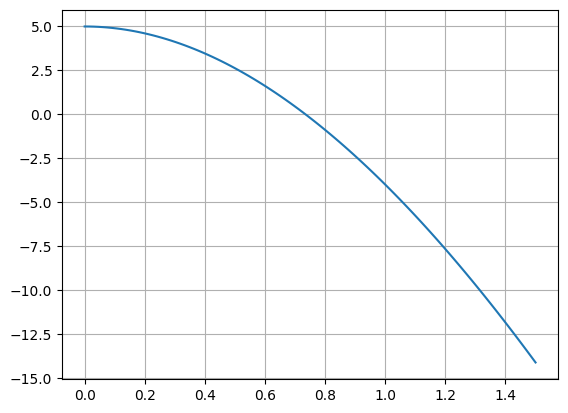

In [1]:
# Plot the function on the given range, then work by hand on the plot
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**3 -10*x**2 + 5 

xvals = np.linspace(0, 1.5, 100)
yvals = [f(x) for x in xvals]

plt.plot(xvals, yvals)
plt.grid()

print(f(.70784))

**2. Repeat problem 1, but this time you will use math by hand rather than graphics to perform the first 3 iterations**

**3. Repeat problem 1, except that you will write python functions to calculate a solution that has a relative error less than 1.0E-5.**

**To shorten the assignment, you are only required to implement the Newton-Raphson method.**

*    As needed, use an initial search bracket = $[0,1]$ or an inital guess  $x = 0.5$.
*    There is code in the book for for all methods. **It is okay to look at the code as a guide to understand the logic. Do NOT skip the understanding part.**
*    You will save a lot of time by coding incrementally and printing out intermediate calculations.

In [2]:
def df(x):
  return 3*x**2 - 20*x

def f(x):
    return x**3 -10*x**2 + 5 

def SecantMethod(x):
   return 0

def NewtonRaphsonMethod(x):
   maxIterations = 20
   tolerance = 1E-5
   
   iterations = 0

   while abs(f(x)) > tolerance and iterations < maxIterations:


      print(x, f(x), df(x))
      x = x - (f(x) / df(x))

      iterations += 1

   if iterations == maxIterations:
      return "Failed to converge."
   else: 
      return f"Zero found at x = {x:.5f} after {iterations} iterations."

print(NewtonRaphsonMethod(.5))

0.5 2.625 -9.25
0.7837837837837838 -0.6616784790634318 -13.8327246165084
0.7359494996924367 -0.01761046678840472 -13.09412499555609
0.7346045860923007 -1.4096818580000559e-05 -13.073160028122494
Zero found at x = 0.73460 after 4 iterations.


**4. Failure of solution algorithms**

This equation has two roots in $x = [0,4]$.

\begin{equation}
f(x) = \sin(x)+\cos(1+x^2)-1
\end{equation}

*   Plot this function in the given range.
*   Using the code you wrote earlier, show that the Newton-Raphson method with an initial guess of $x_{i}=3$ fails to find either root.
*   Your code should not run forever; impose a reasonable stop condition.

**You are also encouraged to apply the secant method graphically... but do not hand in. You will see that it blows up quickly.**

'Failed to converge.'

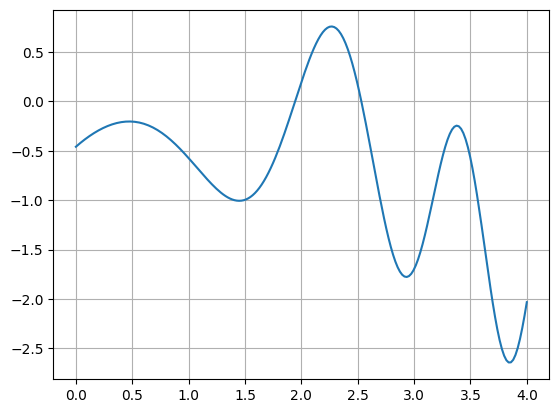

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from math import sin, cos

def f(x):
    return sin(x) + cos(1 + x**2) - 1 

def df(x):
  return cos(x) - 2*x*sin(1 + x**2)

xvals = np.linspace(0, 4, 200)
yvals = [f(x) for x in xvals]

plt.plot(xvals, yvals)
plt.grid()

NewtonRaphsonMethod(3)

**5. Finding a root using the safe Newton-Raphson method**

In the lab you implemented the safe Newton-Raphson method. Repeat problem 4 using the safe Newton-Raphson method.

In [67]:
def SafeNewtonRaphson(a, b):
    tolerance = 1e-5
    maxIterations = 30
    
    if abs(f(a)) < tolerance:
        return a
    
    if abs(f(b)) < tolerance:
        return b
    
    if np.sign(f(a)) != np.sign(f(b)):
        print(f"The bracket [{a}, {b}] is valid!")
    else:
        print(f"The bracket [{a}, {b}] is invalid!")
        #return None
    
    x = (a + b) / 2
    print(f"The initial guess is x = {x:.4f}")

    for iteration in range(maxIterations):
        print(f"\nIteration: {iteration}")

        if abs(f(x)) < tolerance:
            return x
        
        x_next = x - f(x) / df(x)
        print(f"Newton-Raphson Guess: {x_next:.5f}")

        if x_next < a and x_next > b: #if outside the bracket
            print(f"Newton-Raphson is outside of the bracket, using bisection isntead.")
            x_next = (a + b) / 2

        if np.sign(f(a)) != np.sign(f(x_next)): #perform a bisection step instead
            b = x_next
        else:
            a = x_next

        print(f"x guess after iteration {iteration}: {x_next:.5f}")
        print(f"Current Bracket: [{a}, {b}]")

        x = x_next

    print(f"Too many iterations in Newton-Raphson method.")

print(f"Located a root at x = {SafeNewtonRaphson(0, 4)}")

The bracket [0, 4] is invalid!
The initial guess is x = 2.0000

Iteration: 0
Newton-Raphson Guess: 1.94357
x guess after iteration 0: 1.94357
Current Bracket: [1.9435716402746765, 4]

Iteration: 1
Newton-Raphson Guess: 1.94461
x guess after iteration 1: 1.94461
Current Bracket: [1.9435716402746765, 1.944608434454185]

Iteration: 2
Located a root at x = 1.944608434454185
